# Exploratory Data Analysis

org: **D4G**  project: **BGCO**  task: **exploratory data analysis**

data: labeled (engage vs. static) dataset highlighting changes in member engagement (visits per week) between first and year of engagement

## Prep the environment

In [1]:
import pandas as pd  # used to manipulate dataframes
import numpy as np # used to manipulate series

import seaborn as sns  # needed for visualing
import matplotlib.pyplot as plt  # needed for visualing

## Data Wrangling

### Load Data

In [11]:
# read in the dataframe
df_001 = pd.read_csv("D4G_BGCO_Churn_Labeled_ForEDA.csv", encoding = "cp1252")

In [12]:
df = df_001

In [13]:
print("The training set has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))

The training set has 2234 rows and 9 columns


In [14]:
df.head()

,d4g_member_id,label,first_year,member_location,postal_code,sex,Y1_Age,checkin_total,season_most
0,-2145542991,static,2013,BRIT,K2H 8S5,F,10,A,winter
1,-2145245024,static,2015,RID,NaN,M,17,D,winter
2,-2143641867,engaged,2009,BRIT,K2B 8A3,M,11,B,winter
3,-2140123971,static,2013,PYC,K2E 6J5,M,15,D,winter
4,-2140034903,static,2009,PYC,K2J 0N1,M,7,B,winter


In [15]:
df.columns

Index(['d4g_member_id', 'label', 'first_year', 'member_location',
       'postal_code', 'sex', 'Y1_Age', 'checkin_total', 'season_most'],
      dtype='object')

### Organise Features

* excluding postal code

In [16]:
df = df.drop(['d4g_member_id', 'postal_code'], axis =1)

categorical_features = ['member_location', 'sex', 'season_most', 'checkin_total']

numerical_features = ['first_year', 'Y1_Age']

target = ['label']

## Numerical Features

In [17]:
df[numerical_features].describe()

,first_year,Y1_Age
count,2234.000000,2234.000000
mean,2013.746643,10.756043
std,2.808454,3.214669
min,2009.000000,0.000000
25%,2012.000000,8.000000
50%,2014.000000,11.000000
75%,2016.000000,13.000000
max,2018.000000,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AAE7A9898>,
      dtype=object)

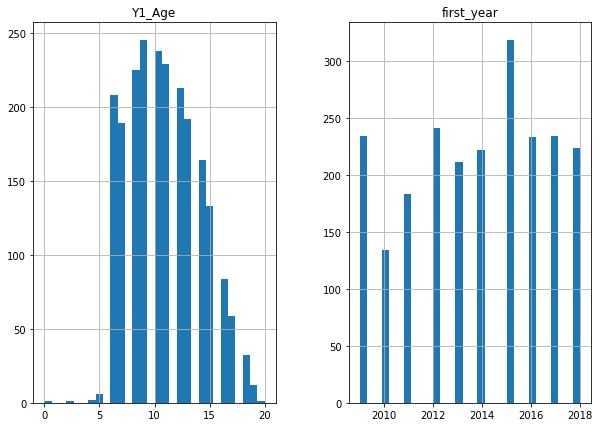

In [19]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027AAF1E3588>,
      dtype=object)

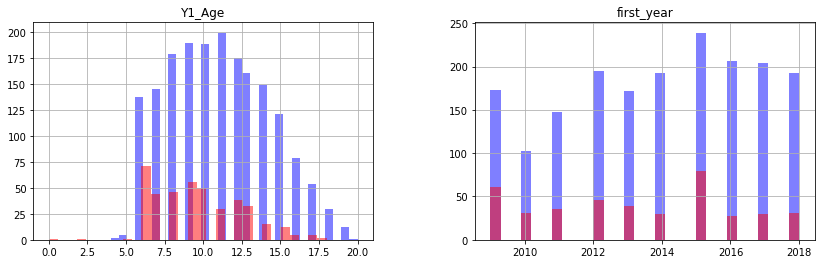

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.label == "engaged"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

## Categorical Features

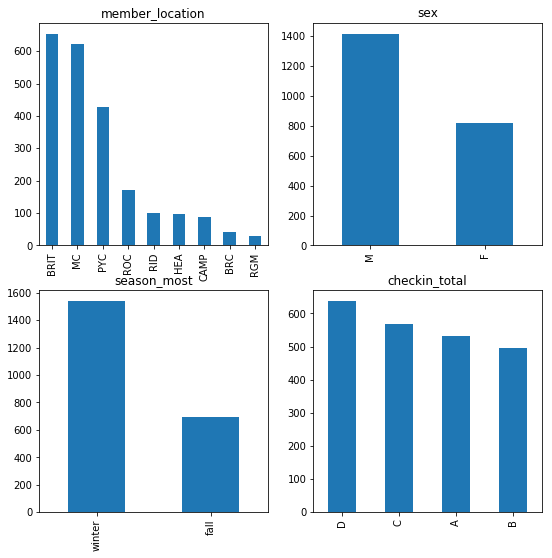

In [22]:
ROWS, COLS = 2, 2
fig, ax = plt.subplots(ROWS, COLS, figsize=(9, 9))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'engaged')

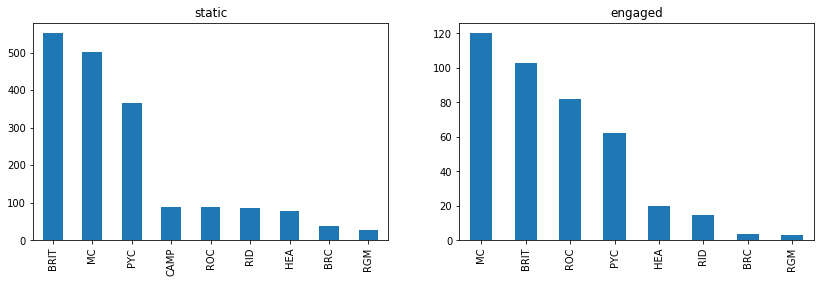

In [23]:
feature = "member_location"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

Text(0.5, 1.0, 'engaged')

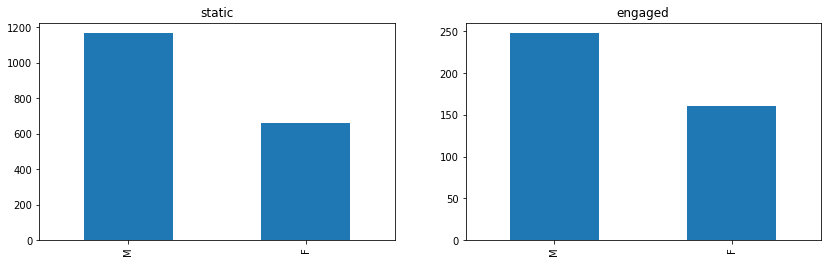

In [24]:
feature = "sex"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

Text(0.5, 1.0, 'engaged')

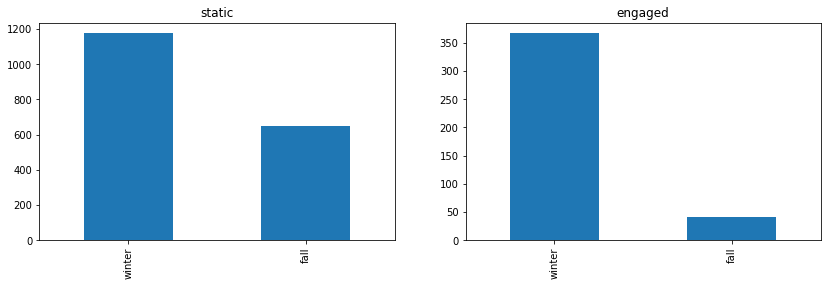

In [25]:
feature = "season_most"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

Text(0.5, 1.0, 'engaged')

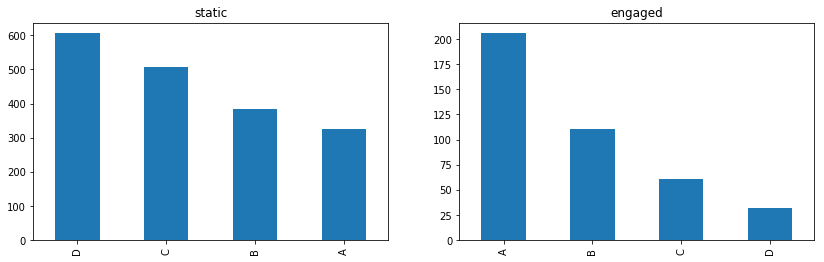

In [26]:
feature = "checkin_total"
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.label == "static"][feature].value_counts().plot('bar', ax=ax[0]).set_title('static')
df[df.label == "engaged"][feature].value_counts().plot('bar', ax=ax[1]).set_title('engaged')

## Target Feature

Text(0.5, 1.0, 'engaged')

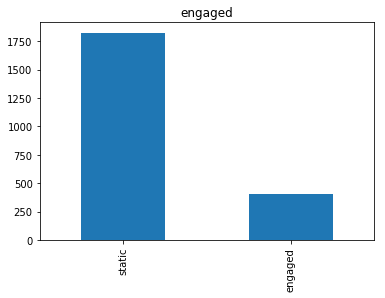

In [27]:
df['label'].value_counts().plot('bar').set_title('engaged')

## Encode Data

In [28]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df.columns:
    if df[column].dtype == object and column != 'customerID':
        if df[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df[column] = le.fit_transform(df[column]) 
        else:
            dummy_columns.append(column)
            
#apply get dummies for selected columns
df = pd.get_dummies(data = df, columns = dummy_columns)

In [29]:
df.head()

,label,first_year,sex,Y1_Age,season_most,member_location_BRC,member_location_BRIT,member_location_CAMP,member_location_HEA,member_location_MC,member_location_PYC,member_location_RGM,member_location_RID,member_location_ROC,checkin_total_A,checkin_total_B,checkin_total_C,checkin_total_D
0,1,2013,0,10,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,2015,1,17,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2009,1,11,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1,2013,1,15,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,2009,1,7,1,0,0,0,0,0,1,0,0,0,0,1,0,0


## Binary Classication Model with XGBoost

In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report

In [31]:
# create feature set and labels
X = df.drop(['label'],axis=1)
y = df.label

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.86
Accuracy of XGB classifier on test set: 0.80


In [32]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.21      0.31        24
           1       0.82      0.97      0.89        88

   micro avg       0.80      0.80      0.80       112
   macro avg       0.72      0.59      0.60       112
weighted avg       0.78      0.80      0.76       112



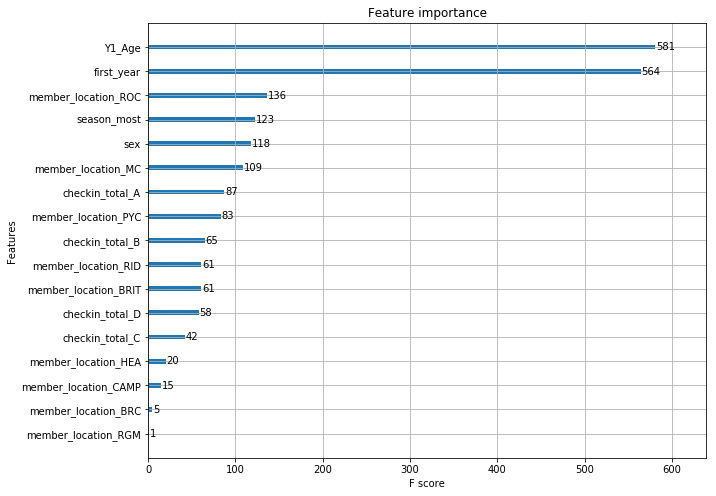

In [33]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)